# _Spotify Recommendation System using Python_

<img src='../data/spotify.jpg'>

_Spotify, kullanıcılarına milyonlarca şarkı ve podcast’e anında erişim imkânı sunan abonelik tabanlı bir müzik ve ses akış platformudur. Spotify’ın dünya çapında bu kadar yaygın kullanılmasının en önemli nedenlerinden biri, kullanıcıların müzik zevklerine göre kişiselleştirilmiş içerikler sunan gelişmiş öneri sistemidir._

_Bu projede, Kaggle üzerinden elde edilen gerçek bir Spotify veri seti kullanılarak **Python ile bir Spotify Öneri Sistemi** geliştirilmiştir. Projenin temel amacı, şarkıların içerik ve özellik bilgilerini analiz ederek kullanıcılara ilgi alanlarına uygun müzik önerileri sunmaktır._

---

### _🎯 Projenin Amaçları_
- _Spotify şarkı verilerini analiz etmek ve veri ön işleme adımlarını uygulamak_
- _Müzik öneri sistemlerinde kullanılan temel yaklaşımları gerçek bir veri seti üzerinde uygulamak_
- _Şarkıları içerik, tür ve sayısal ses özelliklerine göre önermek_
- _Gerçek hayatta kullanılan müzik öneri sistemlerinin temel mantığını öğrenmek_

### _Popülerlik Tabanlı Öneri Sistemi_
- _Dinlenme popülaritesi yüksek şarkıları önerir_  
- _Yeni kullanıcılar için (cold start problemi) etkilidir_ 

### _İçerik Tabanlı Öneri Sistemi (Content-Based)_
- _Şarkı adı, sanatçı bilgisi ve tür (genre) verilerini kullanır_  
- _TF-IDF ve Cosine Similarity yöntemleri ile benzer şarkılar önerir_  

### _Tür (Genre) Tabanlı Benzerlik_
- _Şarkıların ait olduğu müzik türlerine göre benzerlik hesaplar_  
- _Kullanıcının ilgi duyduğu müzik türüne uygun öneriler sunar_  

---

_Bu proje, veri bilimi ve makine öğrenmesi alanında müzik öneri sistemlerini öğrenmek isteyen öğrenciler için sade, anlaşılır ve uygulamalı bir örnek sunmaktadır._

_Proje kapsamında Spotify platformundaki şarkılar için farklı yaklaşımlar kullanılarak bir öneri sistemi başarıyla geliştirilmiştir. Veri temizleme, özellik çıkarımı ve benzerlik hesaplama adımları detaylı bir şekilde uygulanmıştır._

## _Libraries & Dataset_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/spotify.csv")

In [3]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## _Data Cleaning & Preparation_

In [5]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [6]:
df = df.dropna(subset=["track_name", "track_artist"])

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

## _Netflix Data Visualization_

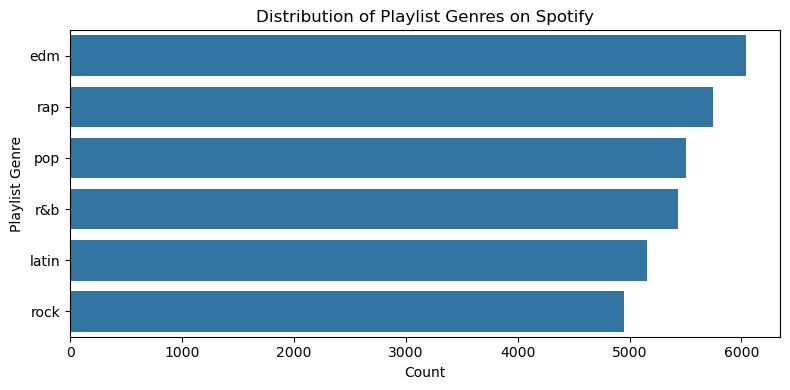

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(
    y="playlist_genre",
    data=df,
    order=df["playlist_genre"].value_counts().index
)

plt.title("Distribution of Playlist Genres on Spotify")
plt.xlabel("Count")
plt.ylabel("Playlist Genre")
plt.tight_layout()
plt.show()

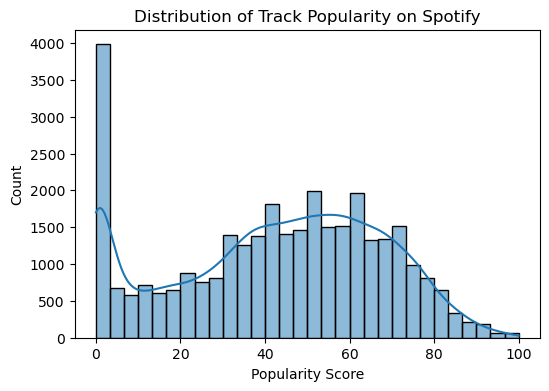

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity on Spotify")
plt.xlabel("Popularity Score")
plt.ylabel("Count")
plt.show()

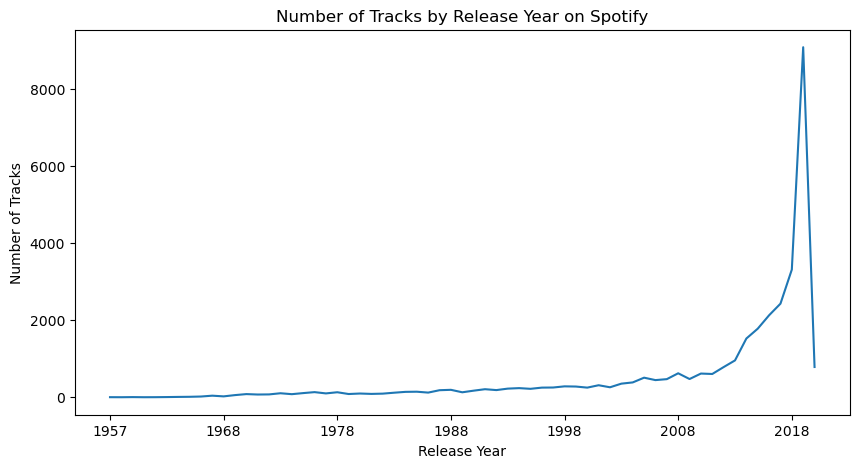

In [11]:
# Yıl bilgisini çıkar
df["release_year"] = df["track_album_release_date"].astype(str).str[:4]

plt.figure(figsize=(10,5))
df["release_year"].value_counts().sort_index().plot()
plt.title("Number of Tracks by Release Year on Spotify")
plt.xlabel("Release Year")
plt.ylabel("Number of Tracks")
plt.show()

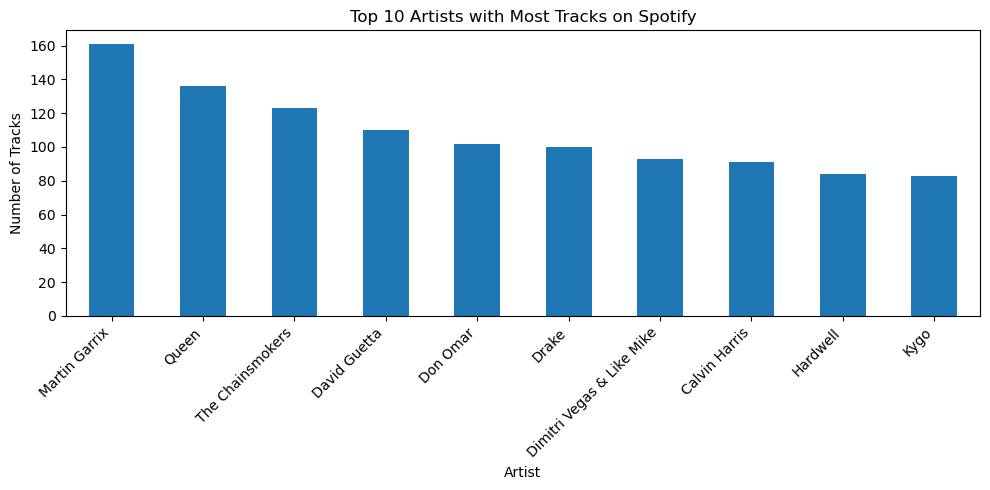

In [12]:
plt.figure(figsize=(10,5))
df["track_artist"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Artists with Most Tracks on Spotify")
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [13]:
popular_tracks = (
    df.sort_values("track_popularity", ascending=False)
      .loc[:, [
          "track_name",
          "track_artist",
          "playlist_genre",
          "track_popularity"
      ]]
      .head(10)
)

popular_tracks

,track_name,track_artist,playlist_genre,track_popularity
20086,Dance Monkey,Tones and I,latin,100
1551,Dance Monkey,Tones and I,pop,100
23099,ROXANNE,Arizona Zervas,r&b,99
30197,ROXANNE,Arizona Zervas,edm,99
20087,ROXANNE,Arizona Zervas,latin,99
21463,ROXANNE,Arizona Zervas,r&b,99
23102,Memories,Maroon 5,r&b,98
23104,Circles,Post Malone,r&b,98
711,Memories,Maroon 5,pop,98
11110,Tusa,KAROL G,rap,98


## _Content-Based Recommendation (Cosine Similarity)_

### _Feature Engineering_

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
df["combined_features"] = (
    df["playlist_genre"] + " " +
    df["track_name"] + " " +
    df["track_artist"] + " " +
    df["playlist_name"]
)

In [16]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df["combined_features"])

### _Cosine Similarity Matrix_

In [17]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [18]:
print(cosine_sim.shape, df.shape)

(32828, 32828) (32828, 25)


## _Recommendation Function_

In [25]:
df["track_id"] = df["track_name"] + " - " + df["track_artist"]

In [35]:
# Track name → index mapping
indices = pd.Series(df.index, index=df["track_id"]).drop_duplicates()

def recommend(song, n=5):
    idx = indices[song]
    idx = idx[0] if hasattr(idx, "__len__") else idx

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]

    song_indices = [i[0] for i in sim_scores]
    return df.iloc[song_indices][
        ["track_name", "track_artist", "playlist_genre", "track_popularity"]
    ]

### _Example Recommendation_

In [36]:
recommend("Dance Monkey - Tones and I")

,track_name,track_artist,playlist_genre,track_popularity
4699,Dance Monkey,Tones and I,pop,43
23752,Dance Monkey,Tones and I,r&b,92
18309,Dance Monkey,Tones and I,latin,92
19716,Dance Monkey,Tones and I,latin,92
20086,Dance Monkey,Tones and I,latin,100


## _Genre-Based Similarity_

In [42]:
genre_matrix = df["playlist_genre"].str.get_dummies(sep=", ")
genre_similarity = cosine_similarity(genre_matrix)

In [47]:
genre_sim_df = pd.DataFrame(
    genre_similarity,
    index=df.index,
    columns=df.index
)

In [49]:
song = "Dance Monkey - Tones and I".strip()

idx = indices[song]
idx = idx.iloc[0] if hasattr(idx, "iloc") else idx

In [51]:
top_genre_sim = (
    genre_sim_df.loc[idx]
    .sort_values(ascending=False)[1:6]
)

recommended_songs = df.loc[
    top_genre_sim.index,
    ["track_name", "track_artist", "playlist_genre"]
]

recommended_songs

,track_name,track_artist,playlist_genre
5,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,pop
6,Never Really Over - R3HAB Remix,Katy Perry,pop
7,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,pop
8,Tough Love - Tiësto Remix / Radio Edit,Avicii,pop
9,If I Can't Have You - Gryffin Remix,Shawn Mendes,pop


## _Save everything needed_

In [53]:
import joblib

In [54]:
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
df.to_csv("metadata.csv", index=False)

## _Proje Sonucu_

## _📊 Elde Edilen Sonuçlar_
- _Spotify veri seti analiz edilerek eksik ve hatalı veriler ele alınmıştır_  
- _Popülerlik tabanlı analiz ile en popüler şarkılar belirlenmiştir_  
- _İçerik tabanlı öneri sistemi sayesinde seçilen bir şarkıya benzer müzikler önerilmiştir_  
- _Tür bazlı benzerlik hesaplamaları ile kullanıcı müzik zevkine uygun öneriler sunulmuştur_  

---

## _🚀 Projenin Katkıları_
- _Gerçek dünya Spotify veri seti ile müzik öneri sistemi geliştirme deneyimi kazanılmıştır_  
- _Spotify gibi büyük müzik platformlarının öneri sistemlerinin temel çalışma mantığı anlaşılmıştır_ 
- _Veri ön işleme, metin vektörleştirme ve benzerlik hesaplama konularında pratik yapılmıştır_  

_Sonuç olarak, bu proje kullanıcı deneyimini iyileştirmeye yönelik müzik öneri sistemlerinin nasıl geliştirilebileceğini göstermektedir. Geliştirilen sistem, ilerleyen aşamalarda kullanıcı dinleme geçmişi ve etkileşim verileri eklenerek daha kişiselleştirilmiş öneriler sunacak şekilde genişletilebilir._